In [1]:
# import libraries
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [10]:
# loading dataset
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder

train = np.load('train_data.npy')
train = train/255
label = np.load('train_labels.npy')
le = LabelEncoder()
le.fit(label)
target = le.transform(label)
label = target+1

train_x, val_x, train_y, val_y = train_test_split(train, label, test_size=0.2)
train_x.shape, val_x.shape, train_y.shape, val_y.shape, train.shape

((1475, 100, 100, 3), (369, 100, 100, 3), (1475,), (369,), (1844, 100, 100, 3))

(<matplotlib.axes._subplots.AxesSubplot at 0x24850936508>,
 <matplotlib.image.AxesImage at 0x2485098cfc8>)

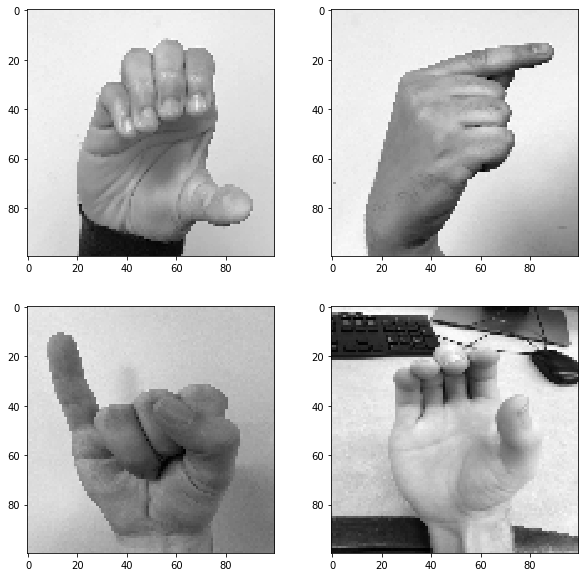

In [3]:
# Show images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [4]:
# convert to tensor
train_x = train_x.reshape(1475, 1, 100, 100)
train_x  = torch.from_numpy(train_x)

train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

train_x.shape, train_y.shape

(torch.Size([1475, 1, 100, 100]), torch.Size([1475]))

In [5]:
# Convert to tensor
val_x = val_x.reshape(369, 1, 100, 100)
val_x  = torch.from_numpy(val_x)

val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

val_x.shape, val_y.shape

(torch.Size([369, 1, 100, 100]), torch.Size([369]))

In [6]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # First 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Second 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(1475, 2500)
        )

    # Forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [7]:
model = Net()
optimizer = Adam(model.parameters(), lr=0.07)
criterion = CrossEntropyLoss()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1475, out_features=2500, bias=True)
  )
)


In [8]:
def train(epoch):
    model.train()
    tr_loss = 0
    # training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # validation set
    x_val, y_val = Variable(val_x), Variable(val_y)


    # clear Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction
    output_train = model(x_train)
    output_val = model(x_val)

    # training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # updated weights 
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [9]:
# number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training
for epoch in range(n_epochs):
    train(epoch)

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #3 'mat1' in call to _th_addmm_

In [ ]:
# plot training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# prediction for training set
with torch.no_grad():
    output = model(train_x.cuda())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

In [2]:
# Imports for Deep Learning
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

Using TensorFlow backend.


In [1]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])



NameError: name 'Sequential' is not defined

In [ ]:
my_model.fit_generator(train_x, epochs=5, validation_data=val_generator)